<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<H3 align='center'> Integrantes: Roberto Calfulef - Matias Moreno </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

In [1]:
#librerias a utilizar

import numpy.matlib 
import numpy as np 
import matplotlib.pyplot as plt

a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [2]:
#Input:
# X = vector de caracteristicas
# W = vector de pesos
# b = bias

#Output:
# 0 o 1 

def perceptron(X,W,b):
    dot =  np.dot(X,W) - b
    if(dot > 0):
        return 1
    return 0 

b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

In [3]:
#Input:
# X = conjunto de entrada
# Y = conjunto de salida
# W = vector de pesos inicial
# b = bias

#Output:
# Vector de pesos 

l_accuracy = list()
def perceptron_clasico(X,Y,W,b):
    i=0
    for vector in X:
        resultado = perceptron(vector,W,b)
        error = Y[i]-resultado
        i = i+1
        if error != 0:
            W += np.multiply(vector,error*.1)
            aciertos = 0
            for j in range(len(Y20)):
                test = perceptron(X_train20[j],W,b)
                if Y20[j] == test:
                    aciertos = aciertos+1
            l_accuracy.append(aciertos/len(Y20)*100)
    return W

c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.

Porcentaje de acierto:  95.57522123893806 %


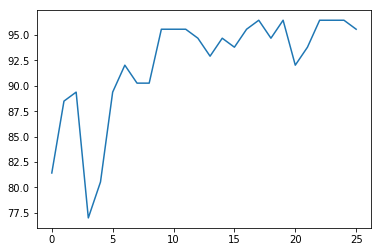

In [4]:
from random import randrange
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want

random = set()
n_datos = len(y_train)
#n_datos.add(elemento)
while len(random) < 0.8*n_datos:
    random.add(randrange(n_datos))

X_train80 = list()
X_train20 = list()
Y80 = list()
Y20 = list()

#Separo el set de datos en proporcion 80 y 20
for j in range(len(X_train)):
    if j in random:
        X_train80.append(X_train[j])
        Y80.append(y_train[j])
    else:
        X_train20.append(X_train[j])
        Y20.append(y_train[j])
        
Wcero = np.zeros(len(X_train[0]))  # Vector de pesos con ceros 
Resultado = perceptron_clasico(X_train80,Y80,Wcero,0)

aciertos = 0

for i in range(len(Y20)):
    test = perceptron(X_train20[i],Resultado,0)
    if Y20[i] == test:
        aciertos = aciertos+1

print ("Porcentaje de acierto: ",aciertos/len(Y20)*100,"%")
#print (l_accuracy)
plt.plot(l_accuracy)

>Al usar el algoritmo, el porcentaje de acierto ronda entre 93% a 95% con un training set de 80% de los datos elegidos aleatoriamente. Lo cual podriamos decir que es un clasificador decente y tiene pocos errores, por lo tanto el algoritmo hace su trabajo.

d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.



In [5]:
#Creo una Cola tipo FIFO de tamaño K
from collections import deque
K = 10
#K_memory = collections.deque(K*[0], K)
K_memory = deque(K*[-1], K) #Lista donde se guardan los indices de los errores

def forgetron(X,W,b):
    suma = 0
    #print(K_memory)
    for i in K_memory:
        if i>=0:  # si el indice existe en la memoria, este sera positivo
            if Y80[i] == 0:
                Y_ = -1
            else:
                Y_ = 1
            suma = suma + Y_*np.dot(X,X_train80[i])
    if(suma > 0):
        return 1
    return 0 

def perceptron_forgetron(X,Y,W,b):
    i=0
    for indice in range(len(X)):
        resultado = forgetron(X[indice],W,b)
        error = Y[i]-resultado
        if error != 0:
            K_memory.appendleft(indice)
            potencia = 1
            for j in K_memory:
                if j > 0:
                    W += np.multiply(X[j],error*.1**(potencia))
                potencia = potencia + 1
        i = i+1
    return W


 e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

In [6]:

pesos = np.zeros(len(X_train[0]))
Resultado = perceptron_forgetron(X_train80,Y80,pesos,0)

aciertos = 0

for i in range(len(Y20)):
    test = perceptron(X_train20[i],Resultado,0)
    if Y20[i] == test:
        aciertos = aciertos+1

print ("Porcentaje de acierto: ",aciertos/len(Y20)*100,"%")

Porcentaje de acierto:  96.46017699115043 %


>Usando el algoritmo modificado, el Forgetrón. El porcentaje de acierto sube, de 95 a un 96%.

f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

In [7]:
def sigmoidal(E):
    if E > 800:
        return 1.0
    elif E < -800:
        return 0.0
    return round(1/(1+np.exp(-1*E)),2)


In [8]:
def perceptron_continuo(X,W,b):
    res = np.dot(X,W) - b
    res = sigmoidal(res) 
    return res

g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

In [9]:
def perdida(X,W,b,y):
    temp = perceptron_continuo(X,W,b)
    if temp == 0:
        return -1
    return round(- y * np.log(temp) - (1-y)*np.log(1-temp),2)

h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

In [10]:
def gradiente(X,Y,W,b):
    sum =  (np.dot(X,W)-b)
    sig = sigmoidal(sum)
    return np.multiply(X,(sig- Y))

i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

In [11]:
l_accuracy = list()
def perceptron_gradiente(X,Y,W,b):
    i=0
    for vector in X:
        resultado = perceptron(vector,W,b)
        error = Y[i]-resultado
        i = i+1
        if error != 0:
            W = W - np.multiply(gradiente(vector,Y[i],W,b), .1 * perdida(vector,W,b,Y[i])) # vector gradiente * tasa aprendizaje * funcion perdida
            aciertos = 0
            for j in range(len(Y20)):
                test = perceptron(X_train20[j],W,b)
                if Y20[j] == test:
                    aciertos = aciertos+1
            l_accuracy.append(aciertos/len(Y20)*100)
    return W

j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

Porcentaje de acierto:  96.46017699115043 %


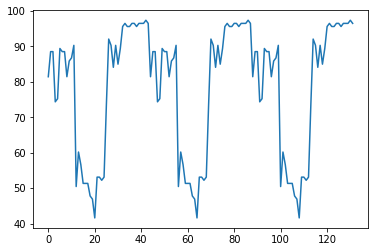

In [14]:
Wcero = np.zeros(len(X_train[0]))  # Vector de pesos con ceros 
Resultado = perceptron_gradiente(X_train80,Y80,Wcero,0)

aciertos = 0
for i in range(len(Y20)):
    test = perceptron(X_train20[i],Resultado,0)
    if Y20[i] == test:
        aciertos = aciertos+1

print ("Porcentaje de acierto: ",aciertos/len(Y20)*100,"%")
plt.plot(l_accuracy)
# plt.scatter(np.arange(len(l_accuracy)),l_accuracy)

>Utilizando el algoritmo con las nuevas modificaciones, se logra un porcentaje de acierto de 96%.